### Tutorial: https://medium.com/analytics-vidhya/complete-guide-to-cnn-for-mnist-digits-classification-with-tensorflow-2-x-a29680ced311

In [2]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

### Load The Data

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

def reshape_with_color_channel(data):
    # TODO What is the purpose of this reshape color channel
    return data.reshape((data.shape[0], data.shape[1], data.shape[2], 1))

x_train = reshape_with_color_channel(x_train)
x_test = reshape_with_color_channel(x_test)

### Preprocess Data

In [4]:
def normalize_image(data):
    return data.astype('float32') / 255.0

x_train = normalize_image(x_train)
x_test = normalize_image(x_test)

In [5]:
def display_images(images, labels, ncols=10):
    fig = plt.figure(figsize=(15, 6))
    nrows = len(images) / ncols
    if len(images) % ncols != 0:
        nrows += 1
    for i in range(len(images)):
        ax = fig.add_subplot(nrows, ncols, i+1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(images[i]), cmap='gray')
        ax.set_title(labels[i])

<ipython-input-5-46f1c5e06ced>:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(nrows, ncols, i+1, xticks=[], yticks=[])


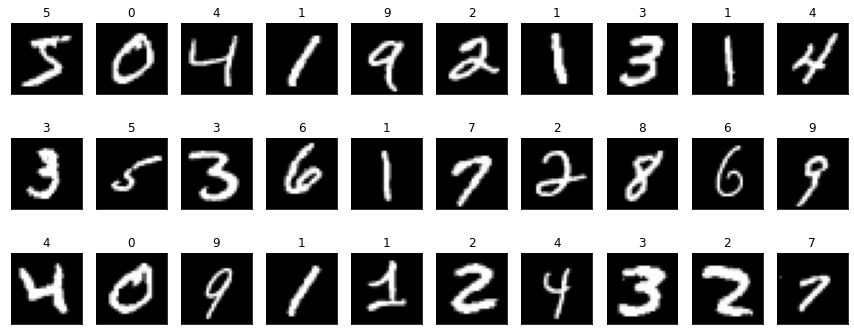

In [6]:
display_images(x_train[0:30], y_train[0:30])

### Train Data


In [7]:
# determine the shape of the input images
inp_shape = x_train.shape[1:]
print(inp_shape)

(28, 28, 1)


In [8]:
# defining the model
# TODO: why these layers
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=inp_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 48)        13872     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               6

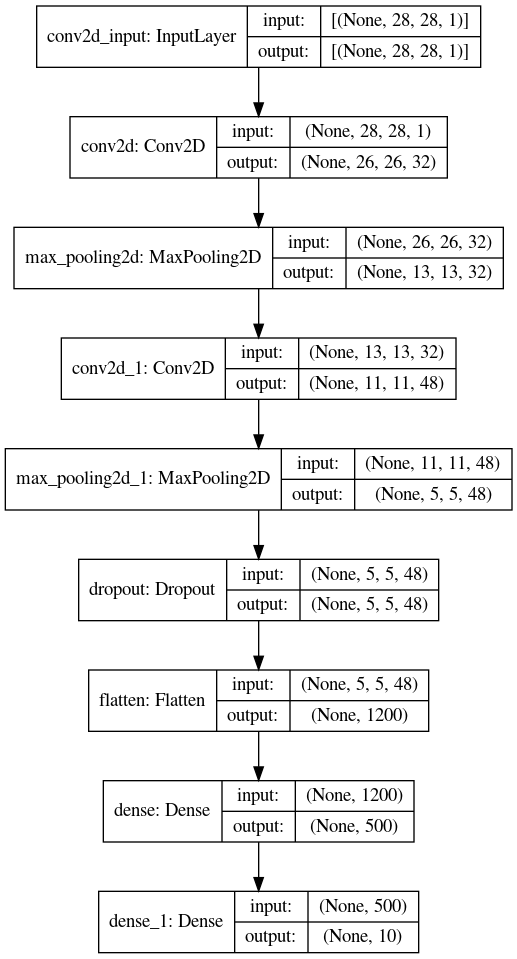

In [10]:
# ploting the model architecture
plot_model(model, 'model.png', show_shapes=True)

In [11]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# fit the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 13s - loss: 0.2437 - accuracy: 0.9259 - val_loss: 0.0544 - val_accuracy: 0.9838
Epoch 2/10
422/422 - 12s - loss: 0.0809 - accuracy: 0.9746 - val_loss: 0.0436 - val_accuracy: 0.9868
Epoch 3/10
422/422 - 12s - loss: 0.0607 - accuracy: 0.9806 - val_loss: 0.0370 - val_accuracy: 0.9898
Epoch 4/10
422/422 - 12s - loss: 0.0484 - accuracy: 0.9842 - val_loss: 0.0346 - val_accuracy: 0.9898
Epoch 5/10
422/422 - 13s - loss: 0.0400 - accuracy: 0.9871 - val_loss: 0.0297 - val_accuracy: 0.9920
Epoch 6/10
422/422 - 13s - loss: 0.0362 - accuracy: 0.9876 - val_loss: 0.0286 - val_accuracy: 0.9920
Epoch 7/10
422/422 - 13s - loss: 0.0323 - accuracy: 0.9893 - val_loss: 0.0263 - val_accuracy: 0.9920
Epoch 8/10
422/422 - 12s - loss: 0.0289 - accuracy: 0.9904 - val_loss: 0.0288 - val_accuracy: 0.9917
Epoch 9/10
422/422 - 12s - loss: 0.0262 - accuracy: 0.9909 - val_loss: 0.0288 - val_accuracy: 0.9913
Epoch 10/10
422/422 - 12s - loss: 0.0244 - accuracy: 0.9920 - val_loss: 0.0296 - val_accura

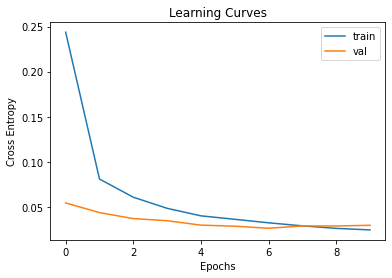

In [13]:
# ploting the learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epochs')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

### Test and Evaluate

In [14]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Accuracy: {accuracy*100}')

313/313 - 1s - loss: 0.0287 - accuracy: 0.9909
Accuracy: 99.08999800682068


### Predict

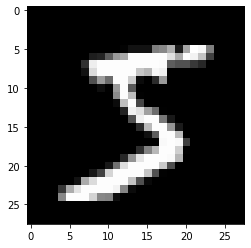

In [15]:
image = x_train[0]
# lets display the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')

In [16]:
# make a prediction
# reshaping the image for model input
image= image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
# predicting the label of image
yhat = model.predict([image])
print('Predicted: {}'.format(argmax(yhat)))

Predicted: 5
